In [6]:
import pandas as pd
data = pd.read_csv("titanic.csv")

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

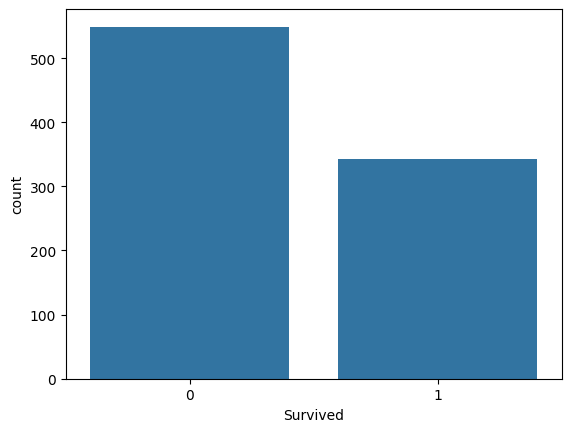

In [4]:
import seaborn as sb

sb.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

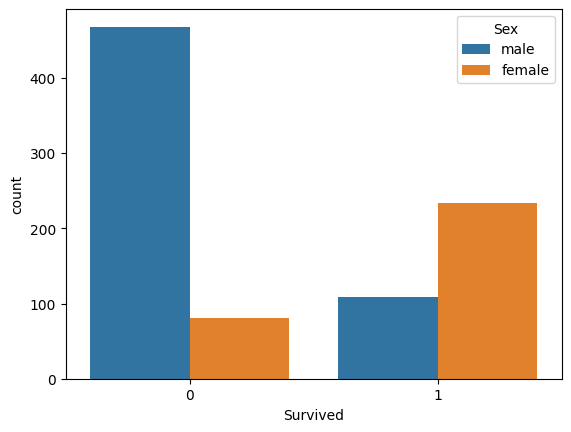

In [5]:
sb.countplot(x="Survived", data=data, hue="Sex")

In [6]:
#Ver valores NaN
print(data.isna())

#Contabilizar la cantidad de datos Nan
data.isna().sum()

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

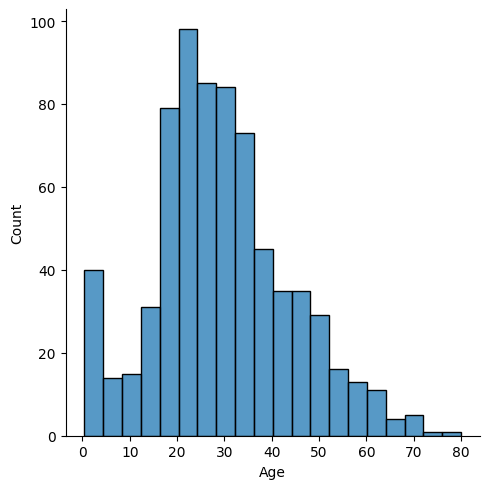

In [7]:
sb.displot(x="Age", data=data)

In [8]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
#Promedio de edad
data["Age"].mean()

np.float64(29.69911764705882)

In [10]:
#Completamos los valores NaN con una edad promedio
data["Age"].fillna(data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
#Asignamos los valores completos al conjunto de origen
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [12]:
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
data = data.drop(["Cabin"], axis=1)

In [14]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
data = data.dropna()

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [18]:
dummies_sex = pd.get_dummies(data["Sex"], dtype=int, drop_first=True)
"""Multicollinearity = situación en la que dos o más variables independientes en un modelo de regresión están altamente 
correlacionadas. Esto dificulta la interpretación de los resultados y la extracción de conclusiones significativas.""" 

'Multicollinearity = situación en la que dos o más variables independientes en un modelo de regresión están altamente \ncorrelacionadas. Esto dificulta la interpretación de los resultados y la extracción de conclusiones significativas.'

In [19]:
#Agregamos los dummies y eliminamos la columna categorica
data = data.join(dummies_sex)
data = data.drop(["Sex"], axis=1)


<Axes: xlabel='Survived', ylabel='count'>

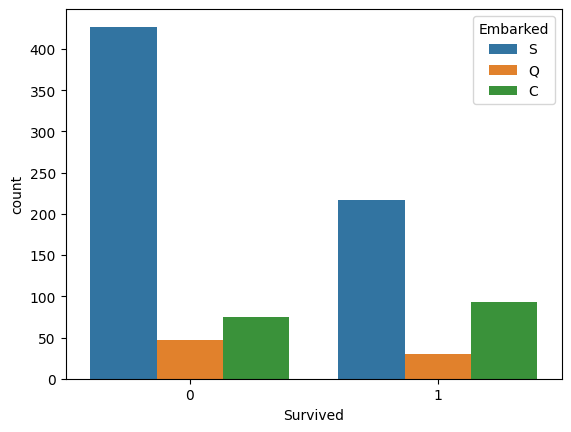

In [20]:
sb.countplot(x="Survived", data=data, hue="Embarked", )

In [21]:
dummies_embarked = pd.get_dummies(data["Embarked"], dtype=int, drop_first=True)

In [22]:
data = data.join(dummies_embarked)
data = data.drop(["Embarked"], axis=1)

In [23]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

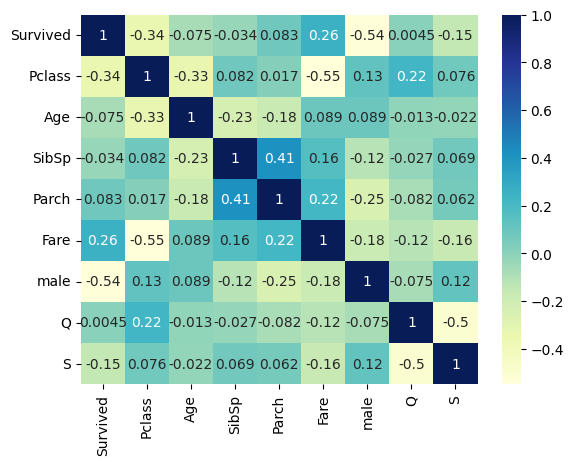

In [24]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

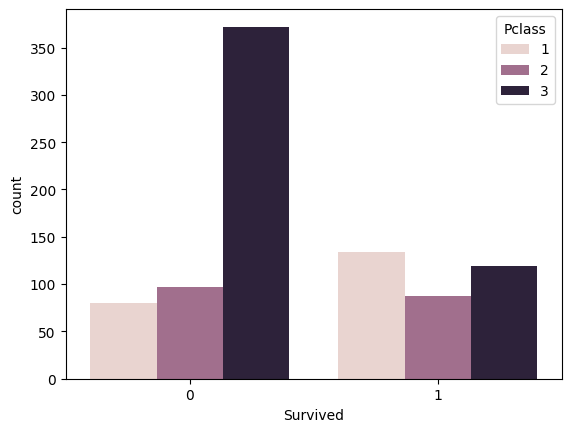

In [25]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [26]:
x = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [27]:
from sklearn.model_selection import train_test_split

x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=.2)



In [28]:
#Decisiopn Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=50)
model.fit(x_tr, y_tr)
predictions = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.7640449438202247

In [32]:
from sklearn.tree import DecisionTreeClassifier

results = []
for i in range (1, 15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_tr, y_tr)
    predictions = model.predict(x_test)
    exact = accuracy_score(y_test, predictions)
    print(f"Resultado para {i}: {exact}")
    results.append(exact)

Resultado para 1: 0.8202247191011236
Resultado para 2: 0.7921348314606742
Resultado para 3: 0.8426966292134831
Resultado para 4: 0.8370786516853933
Resultado para 5: 0.8370786516853933
Resultado para 6: 0.8258426966292135
Resultado para 7: 0.8426966292134831
Resultado para 8: 0.8089887640449438
Resultado para 9: 0.8258426966292135
Resultado para 10: 0.8146067415730337
Resultado para 11: 0.8033707865168539
Resultado para 12: 0.8089887640449438
Resultado para 13: 0.8202247191011236
Resultado para 14: 0.7865168539325843


<Axes: >

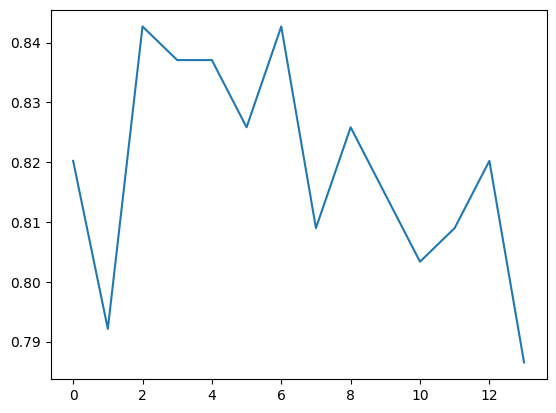

In [33]:
sb.lineplot(data=results)

In [34]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(x_tr, y_tr)
predictions = model.predict(x_test)
exact = accuracy_score(y_test, predictions)


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       106
           1       0.86      0.69      0.77        72

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.83       178



In [37]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,98,8
Real: Si,22,50


[Text(0.45747180451127817, 0.9444444444444444, 'male <= 0.5\n0.47\n711\n[443, 268]\nMurió'),
 Text(0.2669172932330827, 0.8333333333333334, 'Pclass <= 2.5\n0.403\n250\n[70, 180]\nVivió'),
 Text(0.36219454887218044, 0.8888888888888888, 'True  '),
 Text(0.10526315789473684, 0.7222222222222222, 'Age <= 3.0\n0.126\n133\n[9, 124]\nVivió'),
 Text(0.06766917293233082, 0.6111111111111112, 'Fare <= 88.775\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.05263157894736842, 0.5, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.08270676691729323, 0.5, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.14285714285714285, 0.6111111111111112, 'Fare <= 28.856\n0.115\n131\n[8, 123]\nVivió'),
 Text(0.11278195488721804, 0.5, 'Fare <= 28.231\n0.219\n56\n[7, 49]\nVivió'),
 Text(0.09774436090225563, 0.3888888888888889, 'Age <= 56.0\n0.194\n55\n[6, 49]\nVivió'),
 Text(0.06015037593984962, 0.2777777777777778, 'SibSp <= 0.5\n0.171\n53\n[5, 48]\nVivió'),
 Text(0.03007518796992481, 0.16666666666666666, 'Fare <= 13.25\n0.105\n36\n[2, 34]\nVivió'),
 Text(0.0150

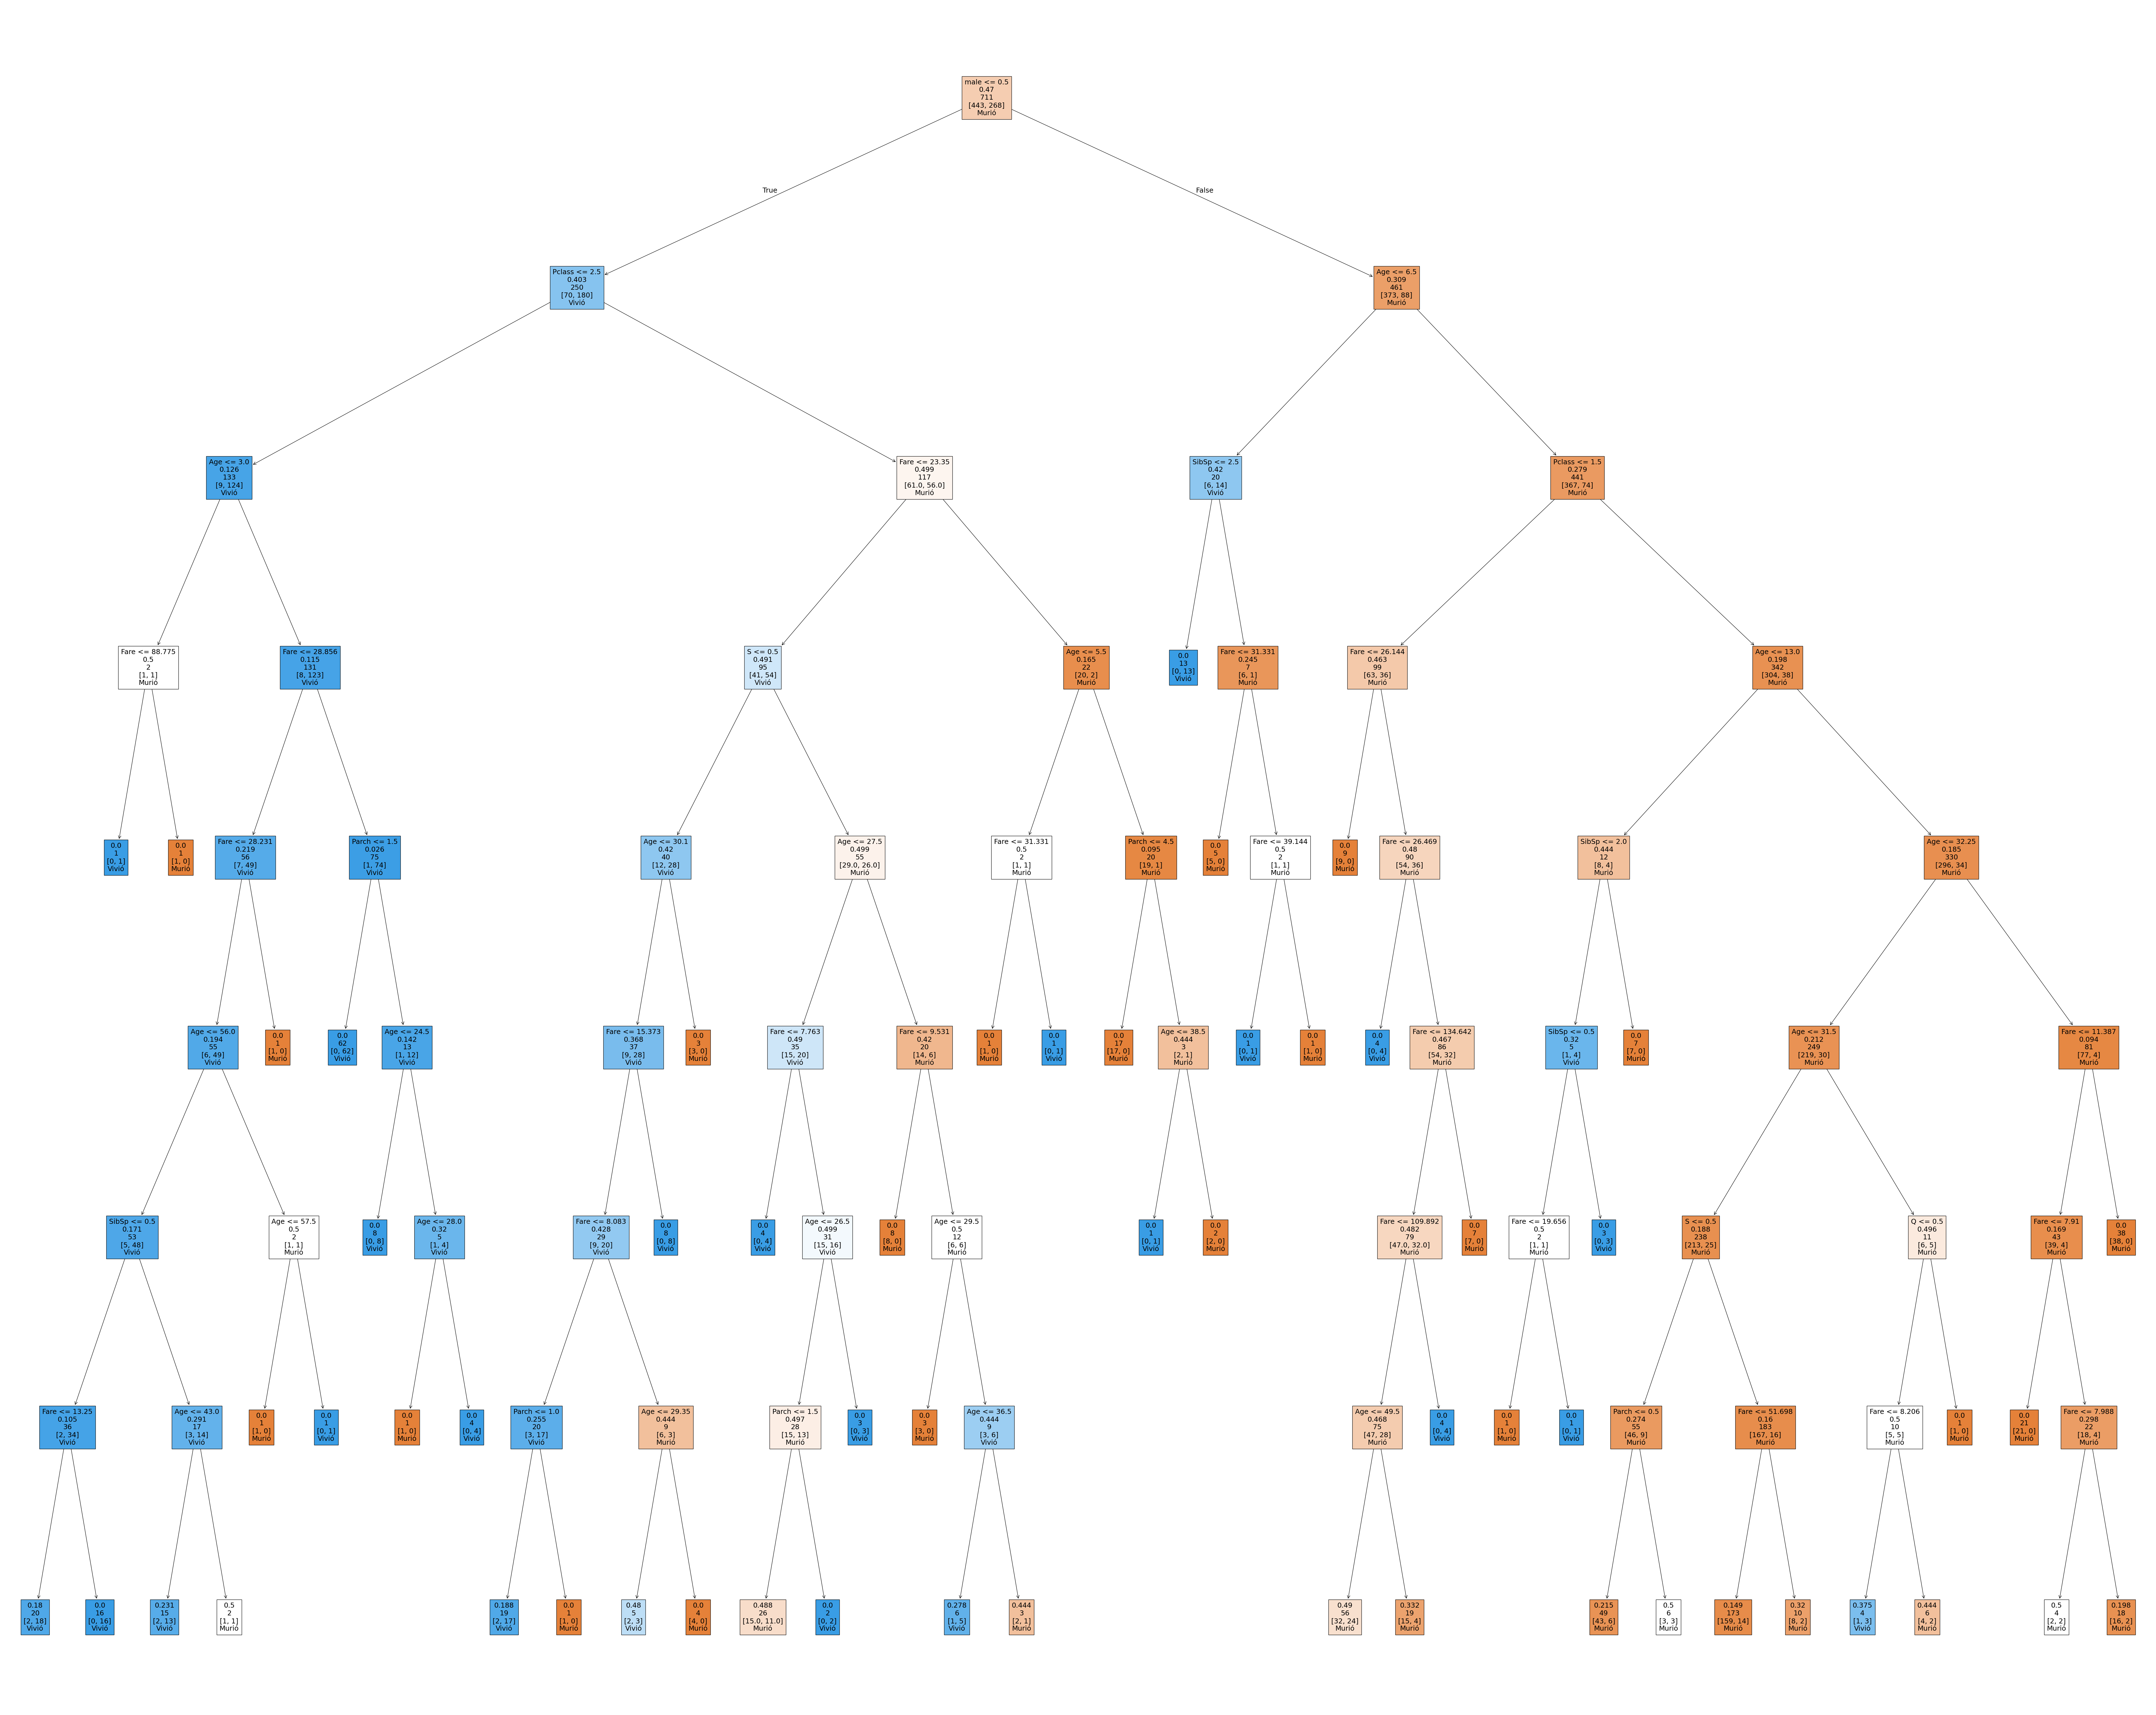

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    model,
    feature_names=x_test.columns,
    class_names=["Murió", "Vivió"],
    filled=True,
    label="none"
)